In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}

На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

## Решение

In [ ]:
def linan():
    a11, a12, b1 = map(float, input("Введите 3 коэффициента для 1-ого уравнения: ").split())
    a21, a22, b2 = map(float, input("Введите 3 коэффициента для 2-ого уравнения: ").split())

    a = np.array([[a11, a12], [a21, a22]])
    b = np.array([b1, b2])

    x = np.linalg.solve(a, b)

    print(round(x[0], 4), round(x[1], 4))

In [ ]:
linan()

Введите 3 коэффициента для 1-ого уравнения: 1 2 3
Введите 3 коэффициента для 2-ого уравнения: 4 3 2
-1.0 2.0


# Задание 2

---

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```

## Решение

In [ ]:
def decorate_matrix(n: int):
    matrix = np.zeros((n, n), dtype=int)

    matrix[0] = np.ones(n)
    matrix[:, 0] = np.ones(n)
    matrix[:, n - 1] = np.ones(n)
    matrix[n - 1] = np.ones(n)

    return matrix

In [ ]:
n = int(input("Введите размерность матрицы: "))
decorate_matrix(n)

Введите размерность матрицы: 7


array([[1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1]])

# Задание 3

---

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

## Решение

In [ ]:
a, b = map(float, input("Введите 2 коэффициента a и b: ").split())

def f(x):
    return (x[0] + a) ** 2 - b

def g(x):
    return abs(f(x))

Введите 2 коэффициента a и b: 4 6


Для функции F(x) найду минимум с помощью optimize.minimize. 

Для функции G(X) воспользуюсь тем, что это парабола с модулем, то она имеет 1 или 2 минимума. Найду 1 минимум, потом отражу его через центр и так получу 2-ой минимум. Если разница между центром и найденным минимумом меньше заданного eps, то минимум 1.

In [ ]:
f_opt = optimize.minimize(f, np.zeros(1))
g_opt = optimize.minimize(g, np.zeros(1), method='Nelder-Mead')

f_min = f_opt.fun
fx_min = np.round(f_opt.x[0], 4)

calculated_gx_min = g_opt.x[0]
g_min = [g_opt.fun]
gx_min = [round(g_opt.x[0], 4)]
g_diff = abs(fx_min - calculated_gx_min)

if g_diff > 0.0001:
    g_min.append(g_opt.fun)

    if g_opt.x[0] > fx_min:
        gx_min.append(round(fx_min - g_diff, 4))
    else:
        gx_min.append(round(fx_min + g_diff, 4))

print(fx_min, gx_min)

-4.0 [-1.5505, -6.4495]


# Задание 4

---

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

## Решение

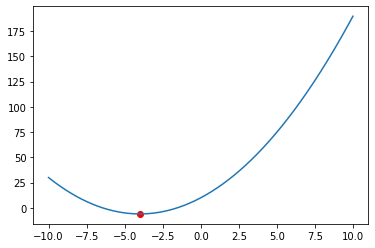

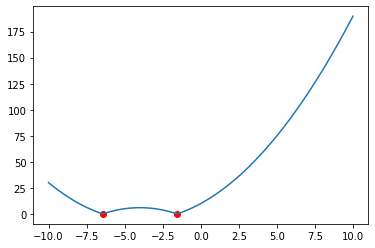

In [ ]:
x = np.arange(-10, 10, 0.01).reshape((2000 , 1))
f_plot = list(map(f, x.tolist()))
g_plot = list(map(g, x.tolist()))

plt.plot(x, f_plot)
plt.scatter(fx_min, f_min, color='red')
plt.show()

plt.plot(x, g_plot)
plt.scatter(gx_min, g_min, color='red')
plt.show()

# Задание 5

---

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

## Решение

1. Найдём вероятность выпадения решки/орла равна 0.5. Нам не важно, какая сторона выпала на первом броске, главное, чтобы остальные 9 бросков совпали с первым.
2. Найдём обратную вероятность. Вероятность того, что человеку НЕ выпало 10 раз та же самая сторона.
3. Найдём вероятность того, что у всех 1000 людей НЕ выпадет 10 раз та же самая сторона.
4. Найдём обратную вероятность. Вероятность того, что хотя бы одному человеку выдадет 10 раз та же самая сторона.

In [ ]:
one_man_success = pow(0.5, 9)
one_man_failure = 1 - one_man_success

all_men_failure = pow(one_man_failure, 1000)
any_men_success = 1 - all_men_failure

print("Пункт 1:", np.round(any_men_success, 4))

Пункт 1: 0.8584


1. Найдём вероятность того, что 1-ые 8 раз выпадет одна и та же сторона. 1-ый бросок нам не важен.
2. Найдём вероятность того, что со 2-ого раза выпадет НЕ та же сторона, что на 1-ом броске, а последующие 7 бросоков совпадут с 2-ым.
3. Найдём вероятность того, что со 3-ого раза выпадет НЕ та же сторона, что на 2-ом броске, а последующие 7 бросоков совпадут с 3-им.
4. Найдём суммарную вероятность этих 3-ёх вероятностей - это вероятность того, что у человека выпала 8 раз одно и то же.
5. Найдём обратную вероятность. Вероятность того, что 8 подряд НЕ выпало.
6. Найдём вероятность того, что у всех 1000 людей НЕ выпадет 8 раз подряд та же самая сторона.
7. Найдём обратную вероятность. Вероятность того, что хотя бы одному человеку выдадет 8 раз подряд та же самая сторона.

In [ ]:
start_from_1 = pow(0.5, 7)
start_from_2 = pow(0.5, 7) * 0.5
start_from_3 = pow(0.5, 7) * 0.5

one_man_success = start_from_1 + start_from_2 + start_from_3
one_man_failure = 1 - one_man_success

all_men_failure = pow(one_man_failure, 1000)
any_men_success = 1 - all_men_failure

print("Пункт 2:", np.round(any_men_success, 8))

Пункт 2: 0.99999986


1. Вероятность выпадения решки/орла равна 0.5. Нам не важно, какая сторона выпала на первом броске, главное, чтобы остальные 9 бросков совпали с первым.
2. Найдём обратную вероятность. Вероятность того, что человеку НЕ выпало 10 раз та же самая сторона.

3. Вероятность того, что сначала у 997 людей не получится выбросить 10 раз ту же самую сторону, а потом у 3-их людей получится.
4. Сколькими способами можно разместить 3-ёх людей (удачливых) среди всех 1000 людей.
5. Домножим перестановки на посчитаную вероятность и получим вероятность того, что 3 удачливых могут быть любыми в очереди.

In [ ]:
one_man_success = pow(0.5, 9)
one_man_failure = 1 - one_man_success

_997_failure_3_success_order = pow(one_man_failure, 997) * pow(one_man_success, 3)
permutations = 1000 * 999 * 998 / (3 * 2 * 1)
_997_failure_3_success = _997_failure_3_success_order * permutations

print("Пункт 3:", np.round(_997_failure_3_success, 4))

Пункт 3: 0.1763


### Проверка случайной выборкой

In [ ]:
def rand():
    men = []
    for i in range(0, 1000, 1):
        throws = []
        for j in range(0, 10, 1):
            throws.append(random.randint(0, 1))

        men.append(throws)
    return men

In [ ]:
def test(men):
    count_13 = 0
    count_2 = 0
    for i in range(0, 1000, 1):
        count0, count1 = 0, 0
        count_same = 1

        for j in range(0, 10, 1):
            if men[i][j] == 0:
                count0 += 1
            else:
                count1 += 1
            if j != 0 and men[i][j] == men[i][j - 1]:
                count_same += 1
            elif count_same != 8:
                count_same = 1

        if count0 == 10 or count1 == 10:
            count_13 += 1
        if count_same == 8:
            count_2 += 1

    return count_13 > 0, count_2 > 0, count_13 == 3

In [ ]:
print("Для точности, по которой можно делать выводы, подойдёт n равное хотя бы 10,000, "
      "но имейте ввиду, что тестирование будет длиться несколько минут.")
n = int(input("Введите количество итераций для проверки: "))
count1 = 0
count2 = 0
count3 = 0
for i in range(0, n, 1):
    fl1, fl2, fl3 = test(rand())

    if fl1:
        count1 += 1

    if fl2:
        count2 += 1

    if fl3:
        count3 += 1

print("При n =", n, ", вероятность в пункте 1 равна: ", round(count1 / n, 5))
print("При n =", n, ", вероятность в пункте 2 равна: ", round(count2 / n, 5))
print("При n =", n, ", вероятность в пункте 3 равна: ", round(count3 / n, 5))

Для точности, по которой можно делать выводы, подойдёт n равное хотя бы 10,000, но имейте ввиду, что тестирование будет длиться несколько минут.
Введите количество итераций для проверки: 10000
При n = 10000 , вероятность в пункте 1 равна:  0.8613
При n = 10000 , вероятность в пункте 2 равна:  0.9997
При n = 10000 , вероятность в пункте 3 равна:  0.1858
